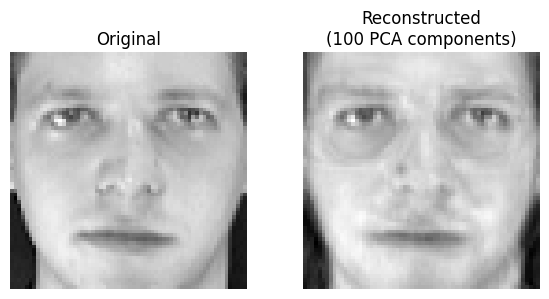

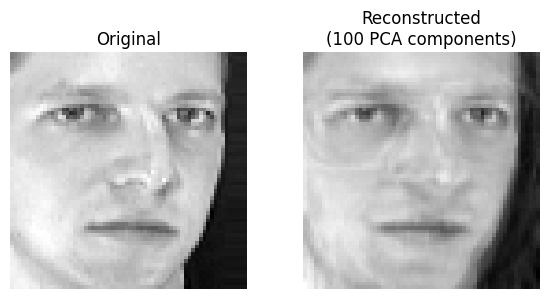

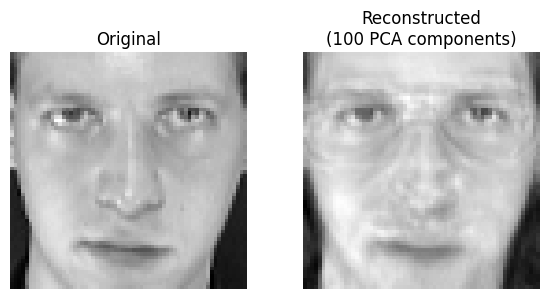

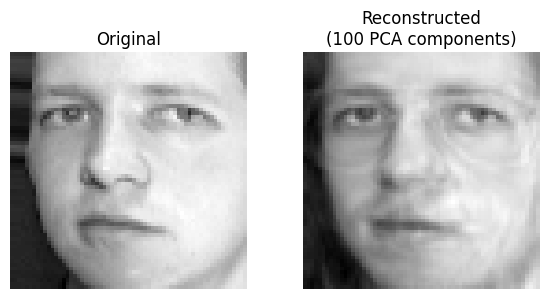

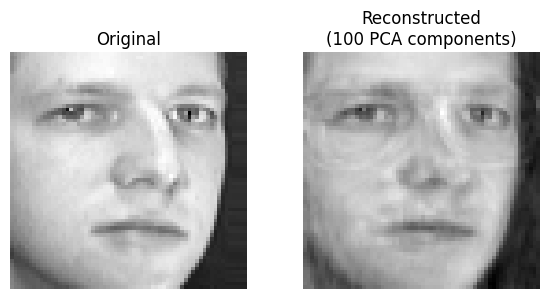

In [1]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Load the Olivetti Faces dataset
faces = fetch_olivetti_faces()
X = faces.data  # Shape: (400, 4096) -> 400 images of 64x64 = 4096 pixels
images = faces.images  # Shape: (400, 64, 64)
targets = faces.target

# Apply PCA
n_components = 100  # You can experiment with different values
pca = PCA(n_components=n_components, whiten=True)
X_pca = pca.fit_transform(X)
X_reconstructed = pca.inverse_transform(X_pca)

# Visualize original vs reconstructed images
num_images = 5  # Change this to show more
for i in range(num_images):
    plt.figure(figsize=(6, 3))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(X[i].reshape(64, 64), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed image
    plt.subplot(1, 2, 2)
    plt.imshow(X_reconstructed[i].reshape(64, 64), cmap='gray')
    plt.title(f"Reconstructed\n({n_components} PCA components)")
    plt.axis('off')

    plt.tight_layout()
    plt.show()


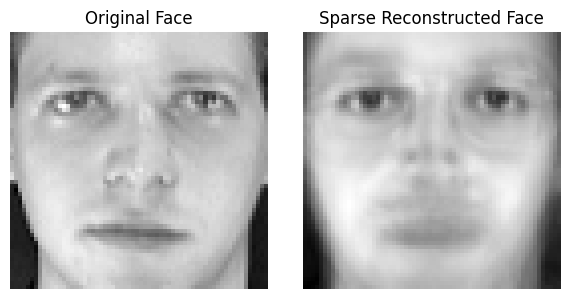

Saved image face_0.png


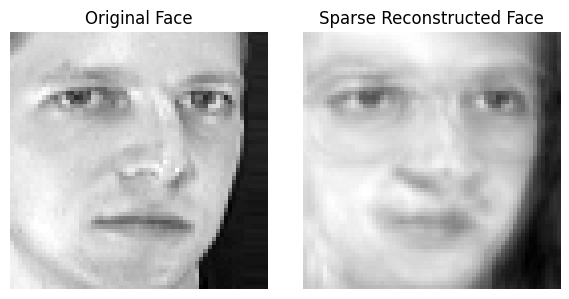

Saved image face_1.png


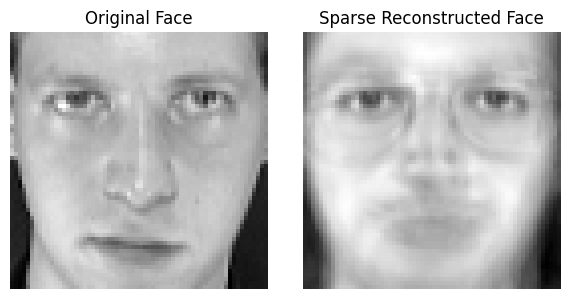

Saved image face_2.png


In [12]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import DictionaryLearning
import matplotlib.pyplot as plt

# Load Olivetti faces dataset
faces = fetch_olivetti_faces()
X = faces.data  # shape (n_samples, 64*64)

# Apply dictionary learning
dict_learner = DictionaryLearning(n_components=32, transform_algorithm='lasso_lars', random_state=42)
X_transformed = dict_learner.fit_transform(X)

# Manual reconstruction using sparse codes and dictionary atoms
X_reconstructed = X_transformed @ dict_learner.components_

# Show original and reconstructed faces
for i in range(2):
    plt.subplot(1, 2, 1)
    plt.imshow(X[i].reshape(64, 64), cmap='gray')
    plt.title("Original Face")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(X_reconstructed[i].reshape(64, 64), cmap='gray')
    plt.title("Sparse Reconstructed Face")
    plt.axis('off')

    plt.show()
